# Trabajo Práctico - Regresión Lineal Múltiple

Alumna: Rojas, Paola

Objetivo: predecir la presión arterial en función de varias variables explicativas

In [13]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [14]:
#Cargar dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archivos/dataset_regresion_multiple.csv', sep=";")


Saving dataset_regresion_multiple.csv to dataset_regresion_multiple (2).csv


In [20]:
#Exploración inicial

print("Tipos de datos del dataset:")
print(df.dtypes)

print("\nPrimeras filas del dataset:")
print(df.head())

print("\nDescripción estadística del dataset:")
print(df.describe())

print("\nCorrelaciones con la presión arterial:")
print(df.corr()["presion_arterial"].sort_values(ascending=False))


Tipos de datos del dataset:
edad                  int64
horas_ejercicio       int64
peso                  int64
estres                int64
ingresos              int64
horas_tv              int64
presion_arterial    float64
dtype: object

Primeras filas del dataset:
   edad  horas_ejercicio  peso  estres  ingresos  horas_tv  presion_arterial
0    58                7    81       1     21150        12             73.83
1    48                2    55       1     94740        22             82.26
2    34                2    81       3     86617        24             90.47
3    62                0    53       6     36896        34             93.49
4    27                4    60       7     66175        29             65.74

Descripción estadística del dataset:
             edad  horas_ejercicio       peso      estres      ingresos  \
count  100.000000       100.000000  100.00000  100.000000    100.000000   
mean    41.600000         4.370000   73.28000    4.700000  59778.350000   
std     

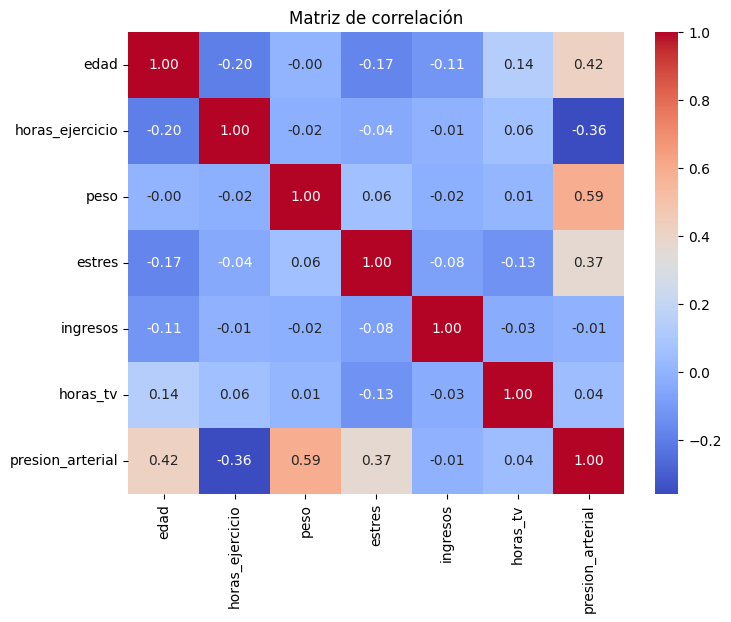

In [21]:
# Mapa de calor de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [22]:
#Modelo de regresión con todas las variables

X = df.drop("presion_arterial", axis=1)
y = df["presion_arterial"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Evaluación modelo completo

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📊 Resultados modelo con todas las variables:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

#Coeficientes
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes del modelo (importancia de cada variable):")
print(coeficientes)


📊 Resultados modelo con todas las variables:
R²: 0.702
MAE: 9.406
RMSE: 11.376

Coeficientes del modelo (importancia de cada variable):
          Variable  Coeficiente
3           estres     3.378969
2             peso     0.789055
0             edad     0.706808
5         horas_tv     0.152845
4         ingresos     0.000062
1  horas_ejercicio    -1.610149



📊 Resultados modelo simplificado (edad, peso, estrés, ejercicio):
R²: 0.700
MAE: 9.402
RMSE: 11.418


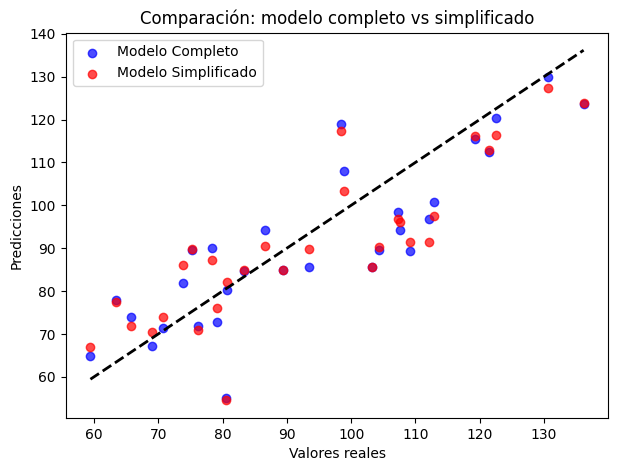

In [23]:
#Modelo simplificado (solo variables relevantes)

variables_relevantes = ["edad", "peso", "estres", "horas_ejercicio"]
X_train_red = X_train[variables_relevantes]
X_test_red = X_test[variables_relevantes]

modelo_red = LinearRegression()
modelo_red.fit(X_train_red, y_train)
y_pred_red = modelo_red.predict(X_test_red)

r2_red = r2_score(y_test, y_pred_red)
mae_red = mean_absolute_error(y_test, y_pred_red)
rmse_red = np.sqrt(mean_squared_error(y_test, y_pred_red))

print("\n📊 Resultados modelo simplificado (edad, peso, estrés, ejercicio):")
print(f"R²: {r2_red:.3f}")
print(f"MAE: {mae_red:.3f}")
print(f"RMSE: {rmse_red:.3f}")


#Comparación visual

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Modelo Completo")
plt.scatter(y_test, y_pred_red, alpha=0.7, color="red", label="Modelo Simplificado")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.title("Comparación: modelo completo vs simplificado")
plt.show()


**Conclusión e interpretación del modelo**

El modelo de regresión lineal múltiple mostró que los factores que más influyen en la presión arterial son edad, peso y nivel de estrés, todos con efecto positivo (a mayor valor, mayor presión). En cambio, las horas de ejercicio tienen un efecto protector, ya que ayudan a reducirla. Las variables de ingresos y horas de TV tuvieron poca relevancia en la predicción, por lo que no mejoran el ajuste del modelo.

En cuanto al desempeño, el modelo ajusta de manera aceptable pero no perfecta. El valor de R² indica que logra explicar una parte importante de la variabilidad de la presión arterial, aunque todavía hay factores externos que no fueron considerados. Los errores (MAE y RMSE) son moderados, lo que significa que las predicciones se acercan bastante a los valores reales, pero no son exactas.

En conclusión, el modelo es útil para identificar tendencias generales y los factores más relevantes, aunque no puede tomarse como una predicción totalmente precisa a nivel individual.